In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp
import seaborn as sb
import os
import re
import scipy.stats as st
%matplotlib inline
plt.style.use('ggplot')

def abrev(i):
    return i[0:3] + i[3:].replace("a", "").replace("e", "").replace("i", "").replace("o", "").replace("u", "")[0:3]

In [2]:
plt.rcParams["figure.facecolor"] = "w"
pd.options.display.max_columns = 1000

In [3]:
os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../Outcome Measurement Data/MALARIA/"

In [257]:
# Esto no incluye toda las áreas del país. Sólo las áreas vistas en la base de datos de notifs.
notifs_das2depto = {
    "Escuintla": 5,
    "Alta Verapaz": 16,
    "Izabal" : 18,
    "Suchitepéquez" : 10,
    "Santa Rosa" : 6,
    "Retalhuleu" : 11,
    "Petén Norte" : 17,
    "Petén SurOccidental" : 17,
    "Huehuetenango" : 13,
    "Quiché" : 14,
    "Petén Sur Oriental" : 17,
    "Baja Verapaz" : 15,
    "Sololá" : 7,
    "Zacapa" : 18,
    "Ixcán" : 14,
    "San Marcos" : 12,
    "Chimaltenango" : 4,
    "Guatemala Central" : 1,
    "Guatemala Sur" : 1,
    "Ixil" : 14,
    "Jutiapa" : 22,
    "Chiquimula" : 20,
    "Ixcan" : 14,
    "El Progreso" : 2,
    "Guatemala Nororiental" : 1,
    "Quetzaltenango" : 9,
    "Jalapa": 21
}
code2depto = {
    5: "Escuintla",
    16:"Alta Verapaz",
    18: "Izabal",
    10: "Suchitepéquez",
    6: "Santa Rosa",
    11: "Retalhuleu",
    17: "Petén",
    13: "Huehuetenango",
    14: "Quiché",
    15: "Baja Verapaz",
    7: "Sololá",
    18: "Zacapa",
    12: "San Marcos",
    4: "Chimaltenango",
    1: "Guatemala",
    22: "Jutiapa",
    20: "Chiquimula",
    2: "El Progreso",
    9: "Quetzaltenango",
    3: "Sacatepequez",
    21: "Jalapa"
}

In [5]:
deptos = data.deptosGTshp

In [6]:
data.munisGTshp.COD_DEPT__.value_counts().sort_index()

01    18
02     8
03    16
04    16
05    14
06    14
07    20
08     8
09    24
10    21
11     9
12    30
13    33
14    21
15     8
16    17
17    14
18     6
19    11
20    11
21     7
22    17
Name: COD_DEPT__, dtype: int64

In [25]:
bednets = pd.read_csv(base_dir + "GTM - Bednets Distr.csv", index_col = 0 , low_memory=False)

In [8]:
notifs = pd.read_excel(base_dir + "Base de datos 2016 - 2018 NAD Consolidado 04.06.xlsx")


In [9]:
def clean(x):
    try: 
        return x.strip().lower()
    except:
        return np.NaN
notifs["deptocode"] = notifs.AREA.map(str.strip).map(notifs_das2depto.get)
notifs["GENERO"] = notifs["GENERO"].apply(clean)
notifs["Gender"] = notifs.GENERO.map(lambda x: "Male" if x == "m" else "Female" if x == "f" else np.NaN)
notifs["Year"] = notifs["FECHA TOMA DE MUESTRA"].map(lambda y: y.year)

In [27]:
#bednets["Sustit2"] = bednets.Sustit.map(lambda x: str(x).lower()[0] != "f")
bednets.Sustit_.value_counts()

False    392323
True     167126
Name: Sustit_, dtype: int64

In [269]:
bednetsYears = bednets[(bednets.Sustit_==False)]\
    .groupby(["year", "CodDepto_e"]).Pabellones.sum().unstack(0).fillna(0)
bednetsYears

year,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
CodDepto_e,,,,,,,
2.0,0.0,0.0,0.0,5137.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,2500.0,346.0,0.0,0.0
5.0,63189.0,12661.0,15720.0,24268.0,25289.0,2103.0,5307.0
6.0,0.0,0.0,6243.0,8393.0,18250.0,0.0,0.0
7.0,0.0,0.0,0.0,6070.0,1936.0,422.0,0.0
9.0,0.0,0.0,0.0,19881.0,14228.0,446.0,1147.0
10.0,63792.0,47455.0,0.0,45613.0,57246.0,59.0,0.0
11.0,29612.0,28303.0,0.0,45595.0,28365.0,0.0,24320.0
12.0,19487.0,20463.0,50.0,25054.0,20500.0,0.0,0.0


In [30]:
notifsYear = notifs.groupby(["Año", "deptocode"]).AREA.count().unstack(0).fillna(0)
notifsYear

Año,1899.0,2014.0,2015.0,2016.0,2017.0,2018.0
deptocode,,,,,,
1,0.0,0.0,3.0,11.0,13.0,0.0
2,0.0,0.0,2.0,0.0,2.0,0.0
4,0.0,0.0,12.0,3.0,2.0,0.0
5,5.0,1.0,3589.0,3194.0,2437.0,878.0
6,0.0,2.0,71.0,149.0,37.0,8.0
7,0.0,0.0,16.0,10.0,1.0,0.0
9,0.0,0.0,3.0,0.0,0.0,0.0
10,1.0,0.0,152.0,241.0,300.0,114.0
11,0.0,0.0,105.0,75.0,34.0,9.0


In [31]:
incidence = notifsYear.stack().rename("notifs").reset_index()
incidence["Population"] = incidence.apply(lambda x: 
                                      hf.GTDeptoPopulation(x.deptocode, x["Año"]), 1)

In [32]:
incidence["incidence"] = incidence.notifs/incidence.Population

In [33]:
incidence = incidence[incidence["Año"]>2014]
incidence = incidence.rename(columns={"Año":  "Year"}).pivot_table(values = "incidence", index = "deptocode",
                                           columns="Year")

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


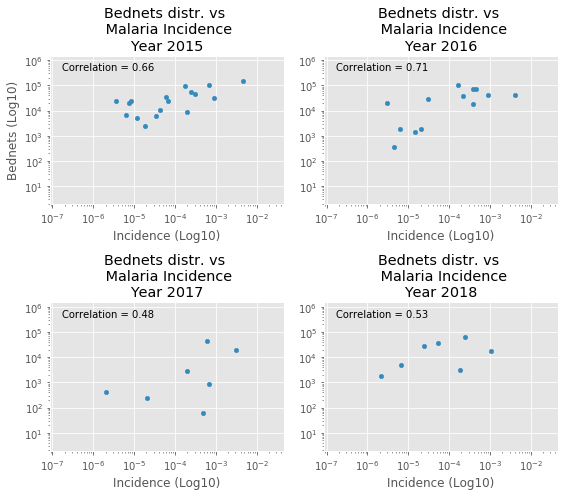

In [232]:
ymax = bednetsYears.max().max()
xmax = notifsYear.max().max()

def plotNotifsVsBednets(ax, year = 2015, ylabel = True):
    temp = pd.DataFrame(data = [bednetsYears[year], incidence[year]]).T.fillna(0)
    #temp = np.log10(temp)
    corr = np.round(np.log10(temp).corr().values[0][1], 2)
    temp.columns = ["Bednets (Log10)", "Incidence (Log10)"]
    ax.set_yscale("log", basey=10)
    ax.set_xscale("log", basex=10)
    temp.plot.scatter("Incidence (Log10)", "Bednets (Log10)",
                      title="Bednets distr. vs \n Malaria Incidence\nYear "+ str(year),
                          ax = ax)
    plt.text(0.05,0.9, "Correlation = "+str(corr), transform=ax.transAxes)
    if ylabel == False:
        ax.set_ylabel("")

mlp.rcParams['figure.figsize'] = [8.0, 7.0]
fig, axes = plt.subplots(2,2)
xlims = (np.min(list(filter(lambda x: x>0, incidence.values.flatten())))/10, 
                np.max(incidence.values.flatten())*10)
ylims = (np.min(list(filter(lambda x: x>0, bednetsYears.values.flatten())))/10, 
                np.max(bednetsYears.values.flatten())*10)
    
plotNotifsVsBednets(axes[0][0], 2015)
plotNotifsVsBednets(axes[0][1], 2016, False)
plotNotifsVsBednets(axes[1][0], 2017, False)
plotNotifsVsBednets(axes[1][1], 2018, False)
for row in axes:
    for ax in row:
        ax.set_xlim(xlims[0], xlims[1])
        ax.set_ylim(ylims[0], ylims[1])
plt.tight_layout()

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


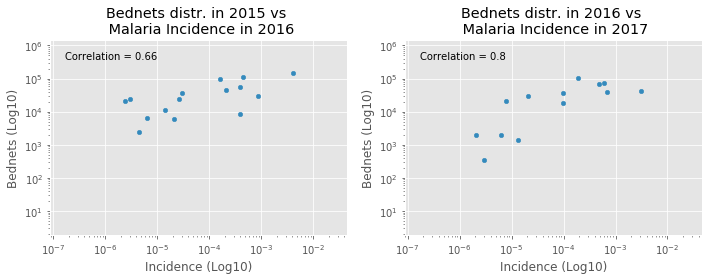

In [233]:
ymax = bednetsYears.max().max()
xmax = notifsYear.max().max()

def plotNotifsVsBednets(ax, year = 2015, ylabel = True):
    temp = pd.DataFrame(data = [bednetsYears[year-1], incidence[year]]).T.fillna(0)
    #temp = np.log10(temp)
    corr = np.round(np.log10(temp).corr().values[0][1], 2)
    temp.columns = ["Bednets (Log10)", "Incidence (Log10)"]
    ax.set_yscale("log", basey=10)
    ax.set_xscale("log", basex=10)
    temp.plot.scatter("Incidence (Log10)", "Bednets (Log10)",
                      title="Bednets distr. in "+str(year-1)+" vs \n Malaria Incidence in "+ str(year),
                          ax = ax)
    plt.text(0.05,0.9, "Correlation = "+str(corr), transform=ax.transAxes)
    if ylabel == False:
        ax.set_ylabel("")

mlp.rcParams['figure.figsize'] = [10.0, 4.0]
fig, axes = plt.subplots(1,2)
xlims = (np.min(list(filter(lambda x: x>0, incidence.values.flatten())))/10, 
                np.max(incidence.values.flatten())*10)
ylims = (np.min(list(filter(lambda x: x>0, bednetsYears.values.flatten())))/10, 
                np.max(bednetsYears.values.flatten())*10)
    

plotNotifsVsBednets(axes[0], 2016, True)
plotNotifsVsBednets(axes[1], 2017, True)
for ax in axes:
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
plt.tight_layout()

In [35]:
pblYears = bednetsYears.divide(1000).reset_index()\
                         .assign(deptocode=lambda x: (x.CodDepto_e * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101"))

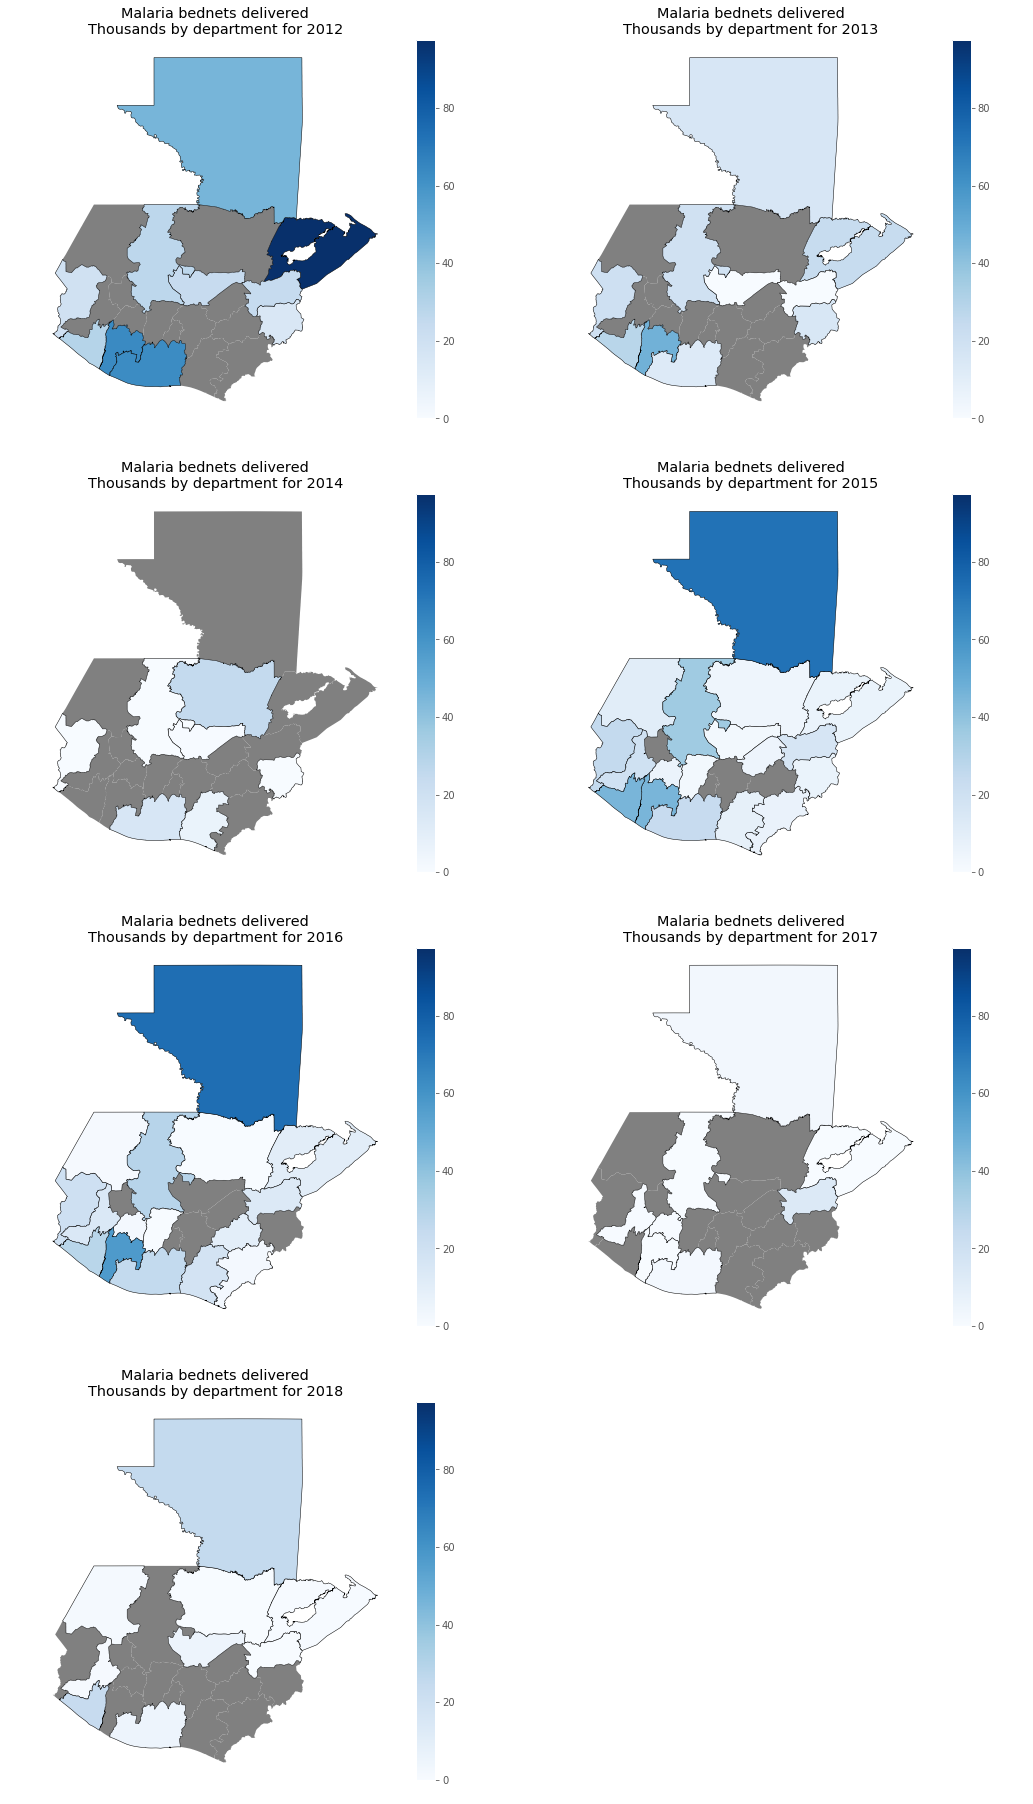

In [36]:
vmax = pblYears[list(range(2012,2018))].max().max()

side = 8
n = 7
vmin = 0
#vmax = 8
f, axes = plt.subplots(int(np.ceil(n/2)), 2, figsize=(side*2*1.1, side*np.ceil(n/2) ))
i = 2012
for row in axes:
    for ax in row:
        if i not in pblYears:
            ax.axis("off")
            continue
        temp3 = deptos.merge(pblYears[[i, "deptocode"]], 
                             left_on="CODIGO", right_on = "deptocode", how="left" ).fillna(0)
        temp3[temp3[i] == 0].plot(ax=ax, color="grey")
        if sum(temp3[i] > 0) > 0:
            temp3[temp3[i] > 0].plot(i, ax = ax, cmap = "Blues", 
                                             legend=True, edgecolor="black",
                                             vmin = vmin, vmax = vmax)
        ax.axis('off')
        ax.set_title("Malaria bednets delivered\nThousands by department for "+ str(i))
        i += 1

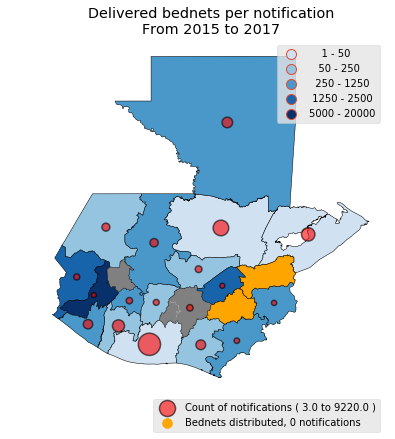

In [37]:
bn_over_notifs = bednetsYears[[2015,2016,2017]].sum(axis=1).divide(notifsYear[[2015,2016,2017]]\
                    .sum(axis=1).reindex(bednetsYears.index).fillna(0))\
                    .reset_index()
bn_over_notifs.columns = ["deptocode", "_i"]
bn_over_notifs["i"] = pd.cut(bn_over_notifs._i, bins = [0,1,50,250,1250,2500, 5000,20000,25000], 
                          labels = ["    0 - 1", "    1 - 50", "   50 - 250", "  250 - 1250", " 1250 - 2500", "2500 - 5000", 
                                    "5000 - 20000", "5000-25000"])
mlp.rcParams['figure.figsize'] = [6.2, 6.2]
temp = deptos.merge(bn_over_notifs.assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )
ax = temp[temp.i.isna()].plot(color="grey") 
    
temp[temp.i.isna()==False].plot("i", ax=ax, vmin = -1,
                                legend=True, edgecolor="black", categorical = True, cmap = "Blues")
temp2 = deptos.merge(notifsYear[[2015,2016,2017]].sum(axis=1,skipna=True).rename("values").reset_index()\
                     .assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                     .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )\
    .assign(x = lambda row: row.geometry.centroid.x)\
    .assign(y = lambda row: row.geometry.centroid.y)
l1 = ax.get_legend()

plt.scatter(temp2.x, temp2.y, np.sqrt(temp2["values"])*5+15, c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
            label = "Count of notifications ( " + str(temp2["values"].min()) + " to " + str(temp2["values"].max()) + " )")
if sum(np.isinf(temp._i)) > 0:
    # Departments with distr. of bednets but no registered Malaria cases.
    temp[np.isinf(temp._i)].plot(ax = ax, color="orange", edgecolors="black")  
plt.scatter([],[], 100, c="orange", label = "Bednets distributed, 0 notifications")
plt.legend(bbox_to_anchor=(1,0))
plt.gca().add_artist(l1)
plt.axis("off")
#ax.legend(ax.legend().get_ labels=["a", "n", "c", "d"])
plt.title("Delivered bednets per notification\nFrom 2015 to 2017")
plt.tight_layout()

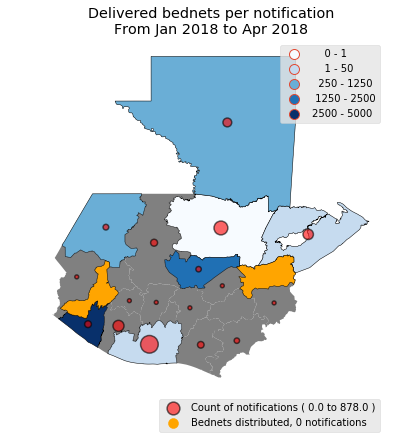

In [38]:
bn_over_notifs = bednetsYears[[2018]].sum(axis=1).divide(notifsYear[[2018]]\
                    .sum(axis=1).reindex(bednetsYears.index).fillna(0))\
                    .reset_index()
bn_over_notifs.columns = ["deptocode", "_i"]
bn_over_notifs["i"] = pd.cut(bn_over_notifs._i, bins = [0,1,50,250,1250,2500, 5000,20000,25000], 
                          labels = ["    0 - 1", "    1 - 50", "   50 - 250", "  250 - 1250", " 1250 - 2500", "2500 - 5000", 
                                    "5000 - 20000", "5000-25000"])
mlp.rcParams['figure.figsize'] = [6.2, 6.2]
temp = deptos.merge(bn_over_notifs.assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                 .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )
ax = temp[temp.i.isna()].plot(color="grey") 
    
temp[temp.i.isna()==False].plot("i", ax=ax, vmin = 0,
                                legend=True, edgecolor="black", categorical = True, cmap = "Blues")
temp2 = deptos.merge(notifsYear[[2018]].sum(axis=1,skipna=True).rename("values").reset_index()\
                     .assign(deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                     .map(lambda y: y if y != "100" else "101")), 
                     left_on="CODIGO", right_on = "deptocode", how="left" )\
    .assign(x = lambda row: row.geometry.centroid.x)\
    .assign(y = lambda row: row.geometry.centroid.y)
l1 = ax.get_legend()

plt.scatter(temp2.x, temp2.y, np.sqrt(temp2["values"])*10+15, c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
            label = "Count of notifications ( " + str(temp2["values"].min()) + " to " + str(temp2["values"].max()) + " )")
if sum(np.isinf(temp._i)) > 0:
    # Departments with distr. of bednets but no registered Malaria cases.
    temp[np.isinf(temp._i)].plot(ax = ax, color="orange", edgecolors="black")  
plt.scatter([],[], 100, c="orange", label = "Bednets distributed, 0 notifications")
plt.legend(bbox_to_anchor=(1,0))
plt.gca().add_artist(l1)
plt.axis("off")
#ax.legend(ax.legend().get_ labels=["a", "n", "c", "d"])
plt.title("Delivered bednets per notification\nFrom Jan 2018 to Apr 2018")
plt.tight_layout()

(Propuesta de Jorge: Correlación entre diferencia de casos de 1 año con el anterior partido las bednets distribuidas en el año anterior. Para cada año)


In [554]:
def compareYears(ax, year, lagb = 1, lagn = 1):
    plt.xscale("log", basex=10)
    #plt.yscale("log", basey=10)
    notifsdiff = notifsYear[year].reindex(list(range(1,23))).sort_index().fillna(0).divide(\
                notifsYear[year-lagn].reindex(list(range(1,23))).sort_index().fillna(0) )
    bednetsprev = bednetsYears[year - lagb].reindex(list(range(1,23))).sort_index().fillna(0)
    plt.scatter(bednetsprev,  notifsdiff)
    #corr = np.corrcoef([bednetsprev, notifsdiff])
    #plt.text(0.05,0.9, "Correlation = "+str(corr[1][0]), transform=ax.transAxes)
    plt.ylabel("Relation of notifications \nbetween years \n " + str(year) + "/"+ str(year-lagn) )
    for b, n, depto in zip(bednetsprev,  notifsdiff, bednetsprev.index):
        if (np.isnan(n) ==False) &\
            (np.isnan(b) ==False) & (np.isinf(n) == False) & (b>0):
            try:
                plt.text(b, n, str(depto), fontsize=8)
            except: 
                pass

    plt.xlabel("Bednets in "+ str(year-lagb) )
    #plt.ylim(0.1, 100)
    plt.xlim(0.5, 100*bednetsprev.max())
    return notifsdiff, bednetsprev

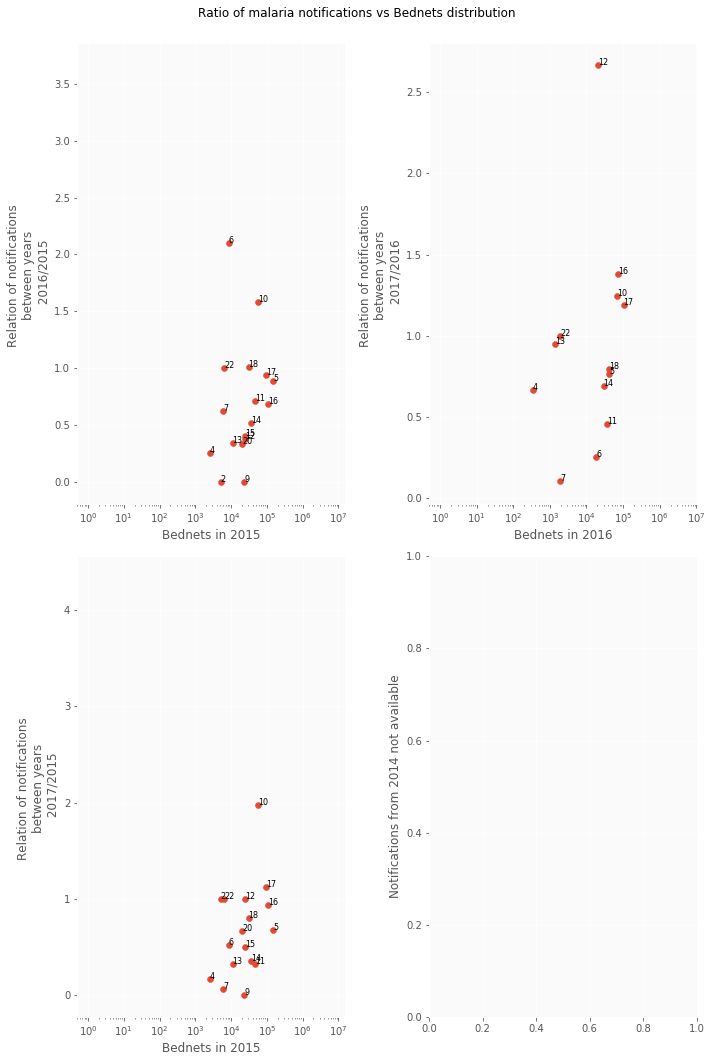

In [558]:
mlp.rcParams['figure.figsize'] = [10, 15]
ax = plt.subplot(2,2,1)
compareYears(ax, 2016, lagb = 1, lagn = 1)
ax = plt.subplot(2,2,2)
data = compareYears(ax, 2017, lagb = 1, lagn = 1)
ax = plt.subplot(2,2,3)
data = compareYears(ax, 2017, lagb = 2, lagn = 2)
ax = plt.subplot(2,2,4)
plt.ylabel("Notifications from 2014 not available")
plt.suptitle("Ratio of malaria notifications vs Bednets distribution")
plt.tight_layout(rect=(0, 0, 1, 0.96))

In [200]:
notifs.Year.value_counts()

2015.0    5411
2016.0    4800
2017.0    4089
2018.0    1463
2014.0       4
Name: Year, dtype: int64

In [207]:
def age_groups(x):
    if x < 40:
        x = np.floor(x/10)*10
        return str(int(x)) + " - " + str(int(x+10))  
    elif x < 60:
        return "40 - 60"
    else:
        return "60 - 100"

In [208]:
d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.deptocode==5)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["AgeGroup","GENERO", "deptocode"]).deptocode.count()\
    .rename("Cases").reset_index()

In [146]:
def plotBetaDistr(a,b):
    x = np.linspace(0,1, 100)
    plt.plot(x, st.beta.pdf(x, a,b)/st.beta.pdf(x, a,b).max() )
    plt.plot(x, st.beta.cdf(x, a,b))
    plt.vlines(st.beta.isf([0.025, 0.975], a,b), [0,0], [1,1])
    
def ratioBayesian(a,b, tol = 0.05):
    phi1 = st.beta.isf(tol/2, a,b)/ (1-st.beta.isf(tol/2, a,b))
    phi2 = st.beta.isf(1-tol/2, a,b)/ (1-st.beta.isf(1-tol/2, a,b))
    return [a/b, phi1,phi2]

#ratioBayesian(5,10)

In [203]:
#plotBetaDistr(100,100)
ratioBayesian(23,4)
[[output[1]-output[0]],[output[2]-output[1]]], output[0]

([[-1.058782641061777], [1.6311442491364163]], -1.3333333333333333)

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


([<matplotlib.axis.XTick at 0x7f05595bfe48>,
 <a list of 6 Text xticklabel objects>)

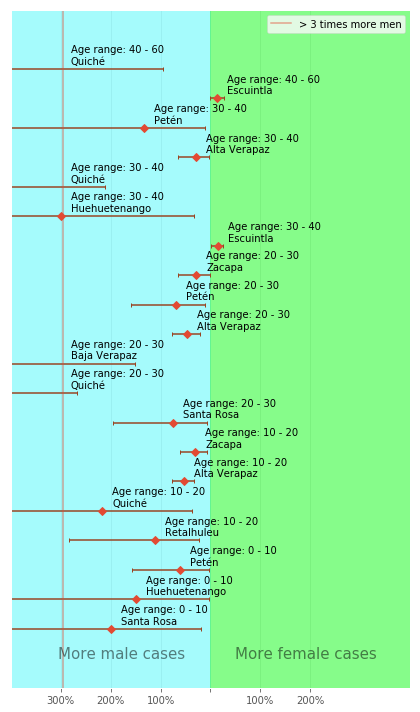

In [258]:
mlp.rcParams['figure.figsize'] = [6, 10]
d2 = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["GENERO", "AgeGroup", "deptocode"]).deptocode.count()\
    .rename("Cases").unstack(0).fillna(0)
diffs = []
j = 0
for i, x in d2.iterrows():
    output = ([y*-1 for y in ratioBayesian(x.m,x.f, 0.05)] if x.m>x.f else ratioBayesian(x.f,x.m,0.05))
    if (output[2]>1) | (output[2]<-1):
        diffs.append([i[0], i[1], x.f, x.m, output[0], output[1], output[2]])
        plt.errorbar(output[0]+(1 if output[0]<0 else -1), j,
                     xerr = [[abs(output[0]-output[1])],[abs(output[0]-output[2])]], fmt="D", ecolor="#994422", capsize=2)
        plt.text(0.2+max(output[0]+(1 if output[0]<0 else -1), -3), j+0.1, 
                 "Age range: " + i[0]+"\n" + code2depto[i[1]], #rotation=90, 
                 verticalalignment='bottom')
        j+=1
diffsdf = pd.DataFrame(diffs, columns= ["Age", "Department", "Female", "Male", "Difference", "CI_1", "CI_2"])
plt.fill_between([-4.2,0], [-2]*2, [len(diffsdf)+1]*2, color="#52fcff", alpha = 0.5)
plt.fill_between([0,4.2], [-2]*2, [len(diffsdf)+1]*2, color="#14ff1c", alpha = 0.5)
plt.text(-0.5, -1, "More male cases", fontsize=15, alpha=0.5, horizontalalignment="right")
plt.text(0.5, -1, "More female cases", fontsize=15, alpha=0.5, horizontalalignment="left")
plt.yticks([])
plt.grid(True, "both", color="#dedede")
plt.rcParams['axes.facecolor'] = '#fafafa'
plt.xlim(-4, 4)
plt.ylim(-2, len(diffsdf)+1)
plt.axvline(-2.95, alpha=0.5, label="> 3 times more men")
plt.tight_layout(rect=(0,0,1,1))
plt.legend()
plt.xticks([2,1,0,-1,-2,-3], ["200%", "100%", "", "100%", "200%", "300%"])

#plt.errorbar(diffsdf.Age, diffsdf.Difference, yerr = diffsdf[["CI_1", "CI_2"]].T.values)
#diffsdf[["CI_1", "CI_2"]].T.shape

/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0.5,1,'Malaria - Gender differences by age and department\nNotifications from 2015 to Apr 2018')

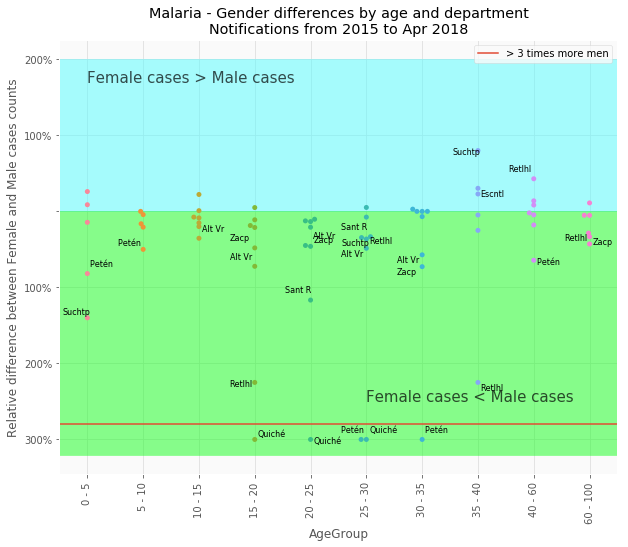

In [111]:
d2 = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["AgeGroup","GENERO", "deptocode"]).deptocode.count()\
    .rename("Cases").unstack(1).fillna(0)
mlp.rcParams['figure.figsize'] = [10, 8]
d = d2[["m", "f"]].apply(lambda x: \
              ((-(x.m-x.f)/x.f if x.m>x.f else (x.f-x.m)/x.m) if x.m+x.f > 15 else np.NaN),1)\
    .apply(lambda x: 0 if np.isinf(x) else -3 if x<-3 else x)\
    .rename("Female-Male").reset_index()
order = [str(x) + " - " + str(x+5) for x in range(0,40, 5)] + ["40 - 60", "60 - 100"]
ageg2x = dict(zip(order, range(0,len(order))))
sb.swarmplot("AgeGroup", "Female-Male", data = d, order=order)
for i, row in d.sort_values("Female-Male").iterrows():
    if abs(row["Female-Male"])>0.3:
        plt.text(ageg2x[row.AgeGroup]+ (-0.45 if np.random.choice([True,False]) else 0.05), 
                 row["Female-Male"]+np.random.choice([0.1,-0.1,0.05,-0.05]), abrev(code2depto[row.deptocode]), fontsize=8)
plt.fill_between([-1,10], [0, 0], [2,2], color="#52fcff", alpha = 0.5)
plt.fill_between([-1,10], [0, 0], [-3.2,-3.2], color="#14ff1c", alpha = 0.5)
plt.grid(True, "both", color="#dedede")
plt.rcParams['axes.facecolor'] = '#fafafa'
plt.xticks(rotation=90)
plt.axhline(-2.8, label="> 3 times more men")
plt.legend()
plt.yticks([2,1,0,-1,-2,-3], ["200%", "100%", "", "100%", "200%", "300%"])
plt.ylabel("Relative difference between Female and Male cases counts")
plt.text(0, 1.7, "Female cases > Male cases", fontsize=15, alpha=0.7)
plt.text(5, -2.5, "Female cases < Male cases", fontsize=15, alpha=0.7)
plt.title("Malaria - Gender differences by age and department\nNotifications from 2015 to Apr 2018")

In [84]:
notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.deptocode==14)
          ]\
        .assign(AgeGroup = lambda x: x.EDAD.map(age_groups)).groupby(["AgeGroup","GENERO", "deptocode"]).deptocode.count()\
    .rename("Cases").unstack(1).fillna(0)

,GENERO,f,m
AgeGroup,deptocode,,
0 - 5,14,1.0,2.0
10 - 15,14,3.0,6.0
15 - 20,14,3.0,13.0
20 - 25,14,3.0,23.0
25 - 30,14,3.0,23.0
30 - 35,14,0.0,18.0
35 - 40,14,3.0,7.0
40 - 60,14,2.0,13.0
5 - 10,14,2.0,2.0


([<matplotlib.axis.XTick at 0x7f05563a9400>,
 <a list of 4 Text xticklabel objects>)

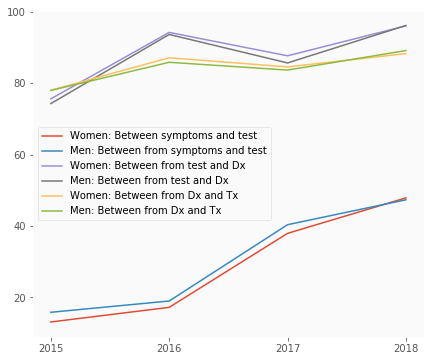

In [262]:
mlp.rcParams['figure.figsize'] = [7, 6]

d = notifs[(notifs.GENERO!="d") & (notifs.EDAD < 100) & (notifs.Year > 2014)
          ].groupby(["Gender", "Year"]).agg({
    'Sintytom': lambda x: 100*sum(x<=3)/len(x), 
    'tomydiag': lambda x: 100*sum(x<=3)/len(x), 
    'diagytrat': lambda x: 100*sum(x<=3)/len(x)
}).unstack(0)
plt.plot(d) 
plt.legend(labels=["Women: Between symptoms and test", 
                   "Men: Between from symptoms and test", 
                   "Women: Between from test and Dx",
                   "Men: Between from test and Dx",
                   "Women: Between from Dx and Tx",
                   "Men: Between from Dx and Tx"], title="")
plt.grid()
plt.xticks([2015, 2016, 2017, 2018], [2015,2016,2017,2018])
#plt.title("Malaria: \nPercentage of delays that are less than 3 days long")

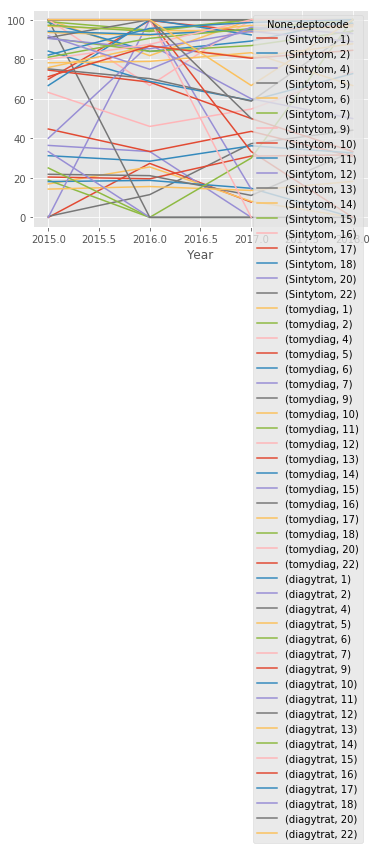

In [68]:
d = notifs[(notifs.EDAD < 100) & (notifs.Year > 2014)
          ].groupby(["deptocode", "Year"]).agg({
    'Sintytom': lambda x: 100*sum(x<=3)/len(x), 
    'tomydiag': lambda x: 100*sum(x<=3)/len(x), 
    'diagytrat': lambda x: 100*sum(x<=3)/len(x)
}).round(1)
d.unstack(0).plot()

In [263]:

mlp.rcParams['figure.figsize'] = [7, 3]
def delayPlot(column):
    q1,q2,q3 = (
     np.nanpercentile(notifs[column][notifs[column]>3],25),
     np.nanpercentile(notifs[column][notifs[column]>3],50),
     np.nanpercentile(notifs[column][notifs[column]>3],75))
    iqr = q3-q1
    m = notifs[column][notifs[column]>3].mean()
    ax = plt.subplot(1,1,1)
    ungrouped = notifs[(notifs.GENERO!="d") & (notifs[column]>3) & (np.abs(notifs[column]-m)<(1.5*iqr)) & 
           (notifs.EDAD < 100) & (notifs.Year > 2014)]
    grouped = ungrouped.groupby(["Year", "GENERO"])[column]
    #grouped.count().unstack(1).plot(ax=ax)
    #plt.ylabel("Number of cases")
    #plt.legend().remove()
    #ax = plt.subplot(2,1,2)
    means = grouped.mean().reset_index() #.unstack(1)
    ses =  grouped.apply(st.sem).reset_index()
    #means.unstack(1).plot(ax=ax)
    plt.errorbar(means[means.GENERO=="f"].Year, means[means.GENERO=="f"][column],
                 yerr = ses[ses.GENERO=="f"][column], capsize=2, color="#CC3333", label="f")
    plt.errorbar(means[means.GENERO=="m"].Year+0.01, means[means.GENERO=="m"][column],
                 yerr = ses[ses.GENERO=="m"][column], capsize=2, color="#5373FF", label="m")
    plt.legend(title="Gender")
    plt.xticks([2015,2016,2017,2018])
    plt.ylabel("Mean days delay")
    plt.tight_layout(rect=(0,0,1,0.9))
    return grouped

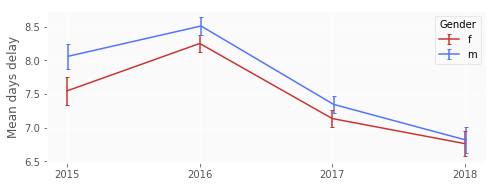

In [264]:
g = delayPlot("Sintytom")
#plt.suptitle("Average days between Symptoms and Test \nfor delays > 3 days")

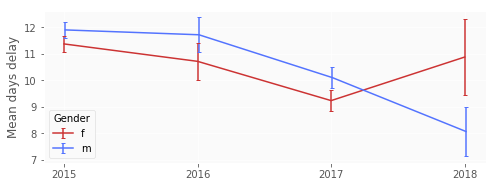

In [265]:
g = delayPlot("tomydiag")
#plt.suptitle("Average days between Test and Dx \nfor delays > 3 days")

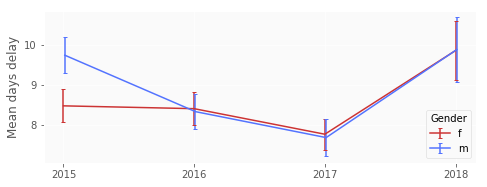

In [266]:
delayPlot("diagytrat")
#plt.suptitle("Average days between Dx and Tx \nfor delays > 3 days")

# Analysis of Malaria bednets effect on incidence 

### Prepare lags

In [447]:
g.sum().sum()

40886.0

In [240]:
notifsSemester = notifs[notifs.Year > 2014].assign(Semester = lambda x: \
                                      x["FECHA TOMA DE MUESTRA"].map(lambda y: (2 if y.month>6 else 1)))\
    .groupby(["deptocode", "Year", "Semester"]).Year.count().unstack([1,2], fill_value = 0).stack([0,1]).rename("Notifs").reset_index()
notifsSemester["semindex"] = 2*(notifsSemester.Year - 2014) + notifsSemester.Semester

In [241]:
bednetsSemester = bednets[((bednets.year==2018) & (bednets.month >= 7)) == False]\
        .assign(Semester = lambda x: x.month.map(lambda y: 2 if y > 6 else 1))\
        .groupby(["year", "Semester", "CodDepto_e"])\
         .Pabellones.sum().unstack([0,1], fill_value = 0).stack([0,1]).reset_index()
bednetsSemester["semindex"] = 2*(bednetsSemester.year - 2014) + bednetsSemester.Semester

In [242]:
def lagBednet(i):
    def lagCalc(x):
        bednetsLag = bednetsSemester[(bednetsSemester.CodDepto_e == x.deptocode) &(bednetsSemester.semindex == (x.semindex - i))][[0]]
        bednetsLag2 = bednetsSemester[(bednetsSemester.CodDepto_e == x.deptocode) &(bednetsSemester.semindex == (x.semindex - i - 1))][[0]]
        
        if len(bednetsLag) == 1:
            return bednetsLag2.values[0][0]+bednetsLag.values[0][0]
        else:
            return 0
    return lagCalc

for i in range(1,5):
    notifsSemester["bednetsLagSem_"+str(i)] = notifsSemester.apply(lagBednet(i), axis = 1)

In [243]:
def lagNotifs(i):
    def lagCalc(x):
        notifsLag = notifsSemester[(notifsSemester.deptocode == x.deptocode) &(notifsSemester.semindex == (x.semindex - i))].Notifs
        if len(notifsLag) == 1:
            return notifsLag.values[0]
        else:
            return 0
    return lagCalc

for i in range(1,5):
    notifsSemester["notifsLagSem_"+str(i)] = notifsSemester.apply(lagNotifs(i), axis = 1)

### Analysis

In [365]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [380]:
notifsSemester["Year_n"] = (notifsSemester.Year - notifsSemester.Year.mean()) #/notifsSemester.Year.std()
for i in range(1,5):
    notifsSemester["notifsLagSem_"+str(i)+"_n"] = (notifsSemester["notifsLagSem_"+str(i)] -\
                                                   notifsSemester["notifsLagSem_"+str(i)].mean())/notifsSemester["notifsLagSem_"+str(i)].std()
    notifsSemester["bednetsLagSem_"+str(i)+"_n"] = \
        (notifsSemester["bednetsLagSem_"+str(i)] -\
            notifsSemester["bednetsLagSem_"+str(i)].mean())/notifsSemester["bednetsLagSem_"+str(i)].std()

In [244]:
notifsSemester.to_csv("/tmp/malaria_gee.csv")

In [394]:
fam = sm.families.Poisson()
mod = smf.glm(formula = "Notifs ~ 1 + C(deptocode) + C(Semester) + " + 
                  #" (notifsLagSem_1_n + notifsLagSem_2_n) + " + 
                  " (bednetsLagSem_1_n + bednetsLagSem_2_n +bednetsLagSem_3_n + bednetsLagSem_4_n)", 
              data = notifsSemester[(notifsSemester.semindex.isin([3,4,5,6,7,8]))], #.assign(Notifs = lambda x: x.Notifs + 1), 
              family=fam)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Notifs   No. Observations:                  108
Model:                            GLM   Df Residuals:                       85
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1120.2
Date:                Mon, 08 Oct 2018   Deviance:                       1787.8
Time:                        12:49:20   Pearson chi2:                 1.97e+03
No. Iterations:                     9   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.6396      0.193      8.505      0.000       1.262       2.017
C(deptocode)[T.2]     -1.9067      0.536     -3.559      0.000      -2.957      -0.857
C(deptocode)[T.4]     -0.5209      0.315     -1.651      0.099      -1.139       0.097
C(deptocode)[T.5]      6.1111      0.194     31.454      0.000       5.730       6.492
C(deptocode)[T.6]      2.2717      0.202     11.228      0.000       1.875       2.668
C(deptocode)[T.7]      0.0107      0.272      0.039      0.969      -0.523       0.544
C(deptocode)[T.9]     -2.1736      0.609     -3.572      0.000      -3.366      -0.981
C(deptocode)[T.10]     3.3520      0.197     17.036      0.000       2.966       3.738
C(deptocode)[T.11]     2.1120      0.204     10.339      0.000       1.712       2.512
C(deptocode)[T.12]    -0.3687      0.304     -1.211      0.226      -0.965       0.228
C(deptocode)[T.13]     1.2446      0.219      5.686      0.000       0.816       1.674
C(deptocode)[T.14]     1.5316      0.214      7.170      0.000       1.113       1.950
C(deptocode)[T.15]     0.3641      0.252      1.446      0.148      -0.129       0.857
C(deptocode)[T.16]     4.6538      0.195     23.815      0.000       4.271       5.037
C(deptocode)[T.17]     2.8697      0.200     14.324      0.000       2.477       3.262
C(deptocode)[T.18]     3.7678      0.195     19.287      0.000       3.385       4.151
C(deptocode)[T.20]    -1.4928      0.451     -3.307      0.001      -2.377      -0.608
C(deptocode)[T.22]    -1.2121      0.403     -3.011      0.003      -2.001      -0.423
C(Semester)[T.2]      -0.4610      0.019    -24.125      0.000      -0.498      -0.424
bednetsLagSem_1_n     -0.0270      0.012     -2.326      0.020      -0.050      -0.004
bednetsLagSem_2_n     -0.0249      0.018     -1.395      0.163      -0.060       0.010
bednetsLagSem_3_n     -0.1261      0.020     -6.467      0.000      -0.164      -0.088
bednetsLagSem_4_n      0.0524      0.015      3.596      0.000       0.024       0.081
======================================================================================
"""

In [211]:
#notifsSemester["bednetsLagSem_1"] = np.log(notifsSemester.bednetsLagSem_1+1)

In [412]:
fam = sm.families.Gaussian()
ind = sm.cov_struct.Exchangeable()
mod = smf.gee(formula = "np.log(Notifs+1) ~ 1+ Year_n + C(Semester) + " + 
                  " (notifsLagSem_1 + notifsLagSem_2  + notifsLagSem_3)*" + 
                  " (bednetsLagSem_1 + bednetsLagSem_2 + bednetsLagSem_3)", 
              data = notifsSemester[(notifsSemester.semindex.isin([5,6,7,8]))], #.assign(Notifs = lambda x: x.Notifs + 1), 
              groups = "deptocode", 
              family=fam, cov_struct=ind)
res = mod.fit()
res.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/generalized_estimating_equations.py:1128: IterationLimitWarning: Iteration limit reached prior to convergence
  IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:          np.log(Notifs + 1)   No. Observations:                   72
Model:                                 GEE   No. clusters:                       18
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                   4
Family:                           Gaussian   Mean cluster size:                 4.0
Dependence structure:         Exchangeable   Num. iterations:                    60
Date:                     Mon, 08 Oct 2018   Scale:                           0.897
Covariance type:                    robust   Time:                         15:58:22
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.2731      0.311      4.100      0.000       0.664       1.882
C(Semester)[T.2]                  -0.3023      0.122     -2.480      0.013      -0.541      -0.063
Year_n                            -0.1218      0.195     -0.624      0.533      -0.504       0.261
notifsLagSem_1                     0.0087      0.001      6.146      0.000       0.006       0.011
notifsLagSem_2                     0.0096      0.002      4.343      0.000       0.005       0.014
notifsLagSem_3                    -0.0005      0.002     -0.224      0.823      -0.005       0.004
bednetsLagSem_1                 1.052e-05   2.53e-06      4.152      0.000    5.55e-06    1.55e-05
bednetsLagSem_2                -6.794e-06   1.68e-06     -4.053      0.000   -1.01e-05   -3.51e-06
bednetsLagSem_3                 1.158e-05   2.04e-06      5.685      0.000    7.59e-06    1.56e-05
notifsLagSem_1:bednetsLagSem_1   5.53e-09   1.19e-08      0.465      0.642   -1.78e-08    2.88e-08
notifsLagSem_1:bednetsLagSem_2 -2.922e-08   2.33e-08     -1.255      0.209   -7.49e-08    1.64e-08
notifsLagSem_1:bednetsLagSem_3 -2.967e-08   2.79e-08     -1.062      0.288   -8.44e-08    2.51e-08
notifsLagSem_2:bednetsLagSem_1 -2.014e-08   8.15e-09     -2.473      0.013   -3.61e-08   -4.18e-09
notifsLagSem_2:bednetsLagSem_2 -9.336e-09   2.32e-08     -0.402      0.688   -5.49e-08    3.62e-08
notifsLagSem_2:bednetsLagSem_3  2.436e-09   1.04e-08      0.234      0.815    -1.8e-08    2.28e-08
notifsLagSem_3:bednetsLagSem_1  5.635e-09   1.54e-08      0.365      0.715   -2.46e-08    3.59e-08
notifsLagSem_3:bednetsLagSem_2  1.938e-08      2e-08      0.967      0.334   -1.99e-08    5.87e-08
notifsLagSem_3:bednetsLagSem_3 -1.067e-08   2.33e-08     -0.458      0.647   -5.64e-08     3.5e-08
==============================================================================
Skew:                          0.2683   Kurtosis:                       0.1926
Centered skew:                 0.6109   Centered kurtosis:              1.6981
==============================================================================
"""

In [277]:
mlp.rcParams['figure.figsize'] = [8, 8]

def mapMalaria(year, ax):
    temp = deptos.merge((np.log10(incidence[year]*100000)).reset_index().assign(i=lambda x: x[year], deptocode=lambda x: (x.deptocode * 100).astype(int).astype(str)\
                                     .map(lambda y: y if y != "100" else "101")), 
                         left_on="CODIGO", right_on = "deptocode", how="left" )
    temp[temp.i.isna() | (temp.i==0) | (np.isinf(temp.i))].plot(color="grey", ax= ax) 

    temp[(temp.i.isna()==False) & (temp.i> -np.Inf)].plot("i", ax=ax, vmin = 0, vmax = temp.i.max(),
                                    legend=False, edgecolor="black", cmap = "Blues")
    temp2 = deptos.merge(bednetsYears[[year+1]].sum(axis=1,skipna=True).rename("values").reset_index()\
                         .assign(deptocode=lambda x: (x.CodDepto_e * 100).astype(int).astype(str)\
                         .map(lambda y: y if y != "100" else "101")), 
                         left_on="CODIGO", right_on = "deptocode", how="left" )\
        .assign(x = lambda row: row.geometry.centroid.x)\
        .assign(y = lambda row: row.geometry.centroid.y)
    l1 = ax.get_legend()
    for i, depto in deptos.iterrows():
        plt.text(depto.geometry.centroid.x, (depto.geometry.bounds[3]+1.5*depto.geometry.centroid.y)/2.5, 
                 abrev(depto.DEPARTAMEN), color="black",
                 horizontalalignment='center', alpha=0.8, fontsize=9)
    temp2 = temp2[temp2["values"]>0]
    plt.scatter(temp2.x, temp2.y, np.sqrt(temp2["values"])*3+25, c = "red", alpha=0.6, linewidths=1.5, edgecolors="black", 
                label = "Distributed bednets ( " + str(temp2["values"].min()) + " to " + str(temp2["values"].max()) + " )")
    cmap = plt.get_cmap('Blues')
    vmax = temp.i.max()
    norm = mlp.colors.Normalize(vmin=0,vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, shrink = 0.5, ticks=np.linspace(0,vmax,10))
    cbar.set_ticklabels([int(np.round(10**x)) for x in np.linspace(0,vmax,10)])
    cbar.set_label("Incidence per 100K habitants")
    plt.legend(bbox_to_anchor=(1,0))
    #plt.gca().add_artist(l1)
    plt.axis("off")
    #ax.legend(ax.legend().get_ labels=["a", "n", "c", "d"])
    plt.title("Malaria incidence per 100K people in "+str(year)+"\n vs distributed bednets in "+str(year+1)+" \n")
    plt.tight_layout()


/home/guillermo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5,1,'')

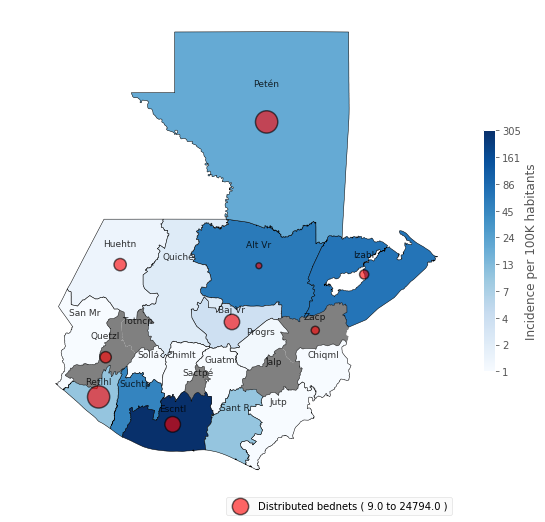

In [281]:
mlp.rcParams["figure.figsize"] = (8,8)
ax = plt.subplot(1,1,1)
mapMalaria(2017, ax)
plt.title("")
#ax = plt.subplot(2,2,2)

#mapMalaria(2016, ax)
#ax = plt.subplot(2,2,3)
#mapMalaria(2017, ax)
#ax = plt.subplot(2,2,4)
#mapMalaria(2018, ax)

In [279]:
bednetsYears

year,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
CodDepto_e,,,,,,,
2.0,0.0,0.0,0.0,5137.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,2500.0,346.0,0.0,0.0
5.0,63189.0,12661.0,15720.0,24268.0,25289.0,2103.0,5307.0
6.0,0.0,0.0,6243.0,8393.0,18250.0,0.0,0.0
7.0,0.0,0.0,0.0,6070.0,1936.0,422.0,0.0
9.0,0.0,0.0,0.0,19881.0,14228.0,446.0,1147.0
10.0,63792.0,47455.0,0.0,45613.0,57246.0,59.0,0.0
11.0,29612.0,28303.0,0.0,45595.0,28365.0,0.0,24320.0
12.0,19487.0,20463.0,50.0,25054.0,20500.0,0.0,0.0


In [21]:
peten = notifs[notifs.deptocode==17].DISTRITO.value_counts()

In [195]:
import difflib
def simplifyName(i):
    i = str(i).lower().strip()
    for v, vt in zip("aeiou", "áéíóú"):
        i = i.replace(vt, v)
    return i
def nombreToCode(i, depto):
    i = simplifyName(i)
    subset = data.munisGT[(data.munisGT.deptocode==depto)]
    ratios = subset.apply(lambda j: \
                   difflib.SequenceMatcher(None, i, j.simplifiedName).real_quick_ratio(),
              1)
    if len(ratios)>0:
        return subset.loc[ratios.idxmax()].municode
    return np.NaN

In [196]:
data.munisGT["simplifiedName"] = data.munisGT.name.map(simplifyName)

In [197]:
list(zip(peten.index, peten.index.map(lambda x: nombreToCode(x, 17))))

[('SAN JOSE', 1702),
 ('Las Cruces', 1703),
 ('FLORES', 1701),
 ('POPTUN', 1701),
 ('Sayaxche', 1702),
 ('El Naranjo', 1703),
 ('SAN FRANCISCO', 1706),
 ('DOLORES', 1708),
 ('MELCHOR DE MENCOS', 1711),
 ('CHACTE', 1701),
 ('SAN LUIS', 1702),
 ('EL CHAL', 1708),
 ('La Libertad', 1705),
 ('SANTA ANA', 1707)]

In [ ]:
data.munisGT[(data.munisGT.deptocode==17)]

In [187]:
ratios = subset.apply(lambda j: \
                   difflib.SequenceMatcher(None, "sjs", j.simplifiedName).real_quick_ratio(),
              1)
    

In [ ]:
subset.loc[ratios.index]

In [193]:
ratios

276    0.857143
277    0.857143
278    0.750000
279    0.666667
280    0.666667
281    0.545455
282    0.857143
283    0.857143
284    0.857143
285    0.750000
286    0.461538
287    0.857143
288    0.666667
289    0.857143
dtype: float64